# Proyek Analisis Data: [Bike Sharing Dataset]
- **Nama:** [Rafi Athallah Kurniawan]
- **Email:** [rafiathallah_@student.ub.ac.id //m006d4ky1817@bangkit.academy]
- **ID Dicoding:** [rafthall]

## Menentukan Pertanyaan Bisnis

- Pada bulan apa sepeda banyak dipakai?
- Apakah terdapat korelasi antara variabel-variabel dalam dataset day.csv dan hour.csv?

## Import Semua Packages/Library yang Digunakan

Disini kita menginstall beberapa library seperti numpy yang digunakan untuk bekerja dengan array numerik, pandas yang digunakan untuk manipulasi dan analisis data, matplotlib yang digunakan untuk membuat visualisasi data seperti grafik, dan seaborn digunakan untuk membuat visualisasi data statistik yang menarik dan informatif.

In [ ]:
pip install numpy pandas scipy matplotlib seaborn jupyter

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data


Di sini kita menggunakan library Pandas untuk membaca file CSV ke dalam DataFrame. Pertama, kita membaca file 'day.csv' menggunakan pd.read_csv('/content/day.csv') dan menyimpannya dalam DataFrame dengan nama df. Kemudian, kita menampilkan lima baris pertama dari DataFrame df menggunakan df.head().
Hal tersebut juga diterapkan pada file ('/content/hour.csv') (sama).

In [ ]:
df = pd.read_csv('/content/day.csv')
df.head()

In [ ]:
pd = pd.read_csv('/content/hour.csv')
pd.head()

### Assessing Data

Cek tipe data

In [ ]:
df.info()

In [ ]:
pd.info()

Cek missing value

In [ ]:
df.isna().sum()

In [ ]:
pd.isna().sum()

Cek duplikasi

In [ ]:
df.duplicated().sum()

In [ ]:
pd.duplicated().sum()

Memberikan deskripsi dataset

In [ ]:
df.describe()

In [ ]:
pd.describe()

### Cleaning Data

In [39]:
# Mengatasi nilai yang hilang
# Menggunakan mean hanya untuk kolom numerik
numeric_cols_df = product_df.select_dtypes(include=[np.number])
product_df[numeric_cols_df.columns] = numeric_cols_df.fillna(numeric_cols_df.mean())

numeric_cols_pd = product_pd.select_dtypes(include=[np.number])
product_pd[numeric_cols_pd.columns] = numeric_cols_pd.fillna(numeric_cols_pd.mean())

# Menghapus duplikat
product_df = product_df.drop_duplicates()
product_pd = product_pd.drop_duplicates()

# Menyimpan dataset yang sudah dibersihkan
product_df.to_csv('/content/cleaned_day.csv', index=False)
product_pd.to_csv('/content/cleaned_hour.csv', index=False)


In [40]:
print("Jumlah baris setelah mengisi nilai yang hilang dan menghapus duplikat untuk dataset day.csv:", len(product_df))
print("Jumlah baris setelah mengisi nilai yang hilang dan menghapus duplikat untuk dataset hour.csv:", len(product_pd))


Jumlah baris setelah mengisi nilai yang hilang dan menghapus duplikat untuk dataset day.csv: 731
Jumlah baris setelah mengisi nilai yang hilang dan menghapus duplikat untuk dataset hour.csv: 17379


## Exploratory Data Analysis (EDA)

### Explore ...

Kode dibawah ini digunakan untuk melakukan Exploratory Data Analysis (EDA) pada dua dataset yang telah dibersihkan, yaitu 'cleaned_day.csv' dan 'cleaned_hour.csv'. Pertama, dilakukan visualisasi distribusi variabel target 'cnt' dalam kedua dataset menggunakan histogram. Selanjutnya, dilakukan visualisasi korelasi antar variabel numerik dalam dataset menggunakan heatmap. Visualisasi ini membantu untuk memahami sebaran dan hubungan antar variabel dalam dataset sebelum dilakukan analisis lebih lanjut.

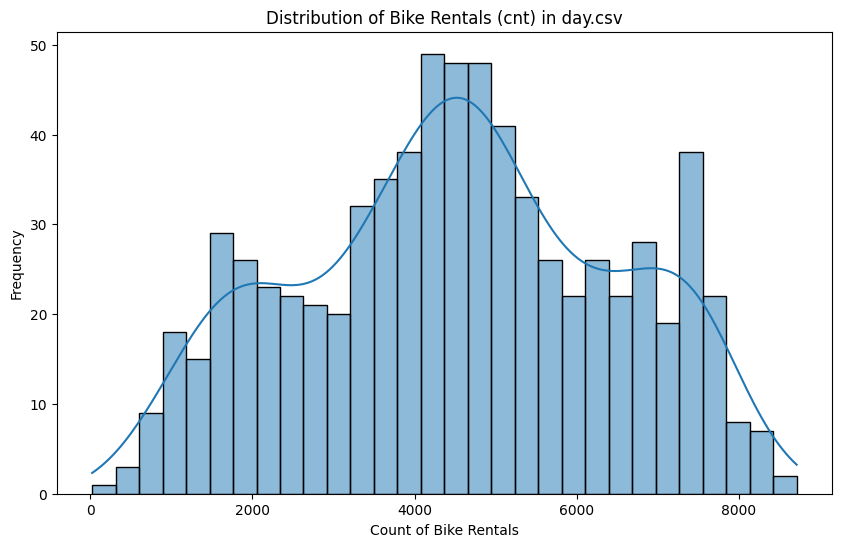

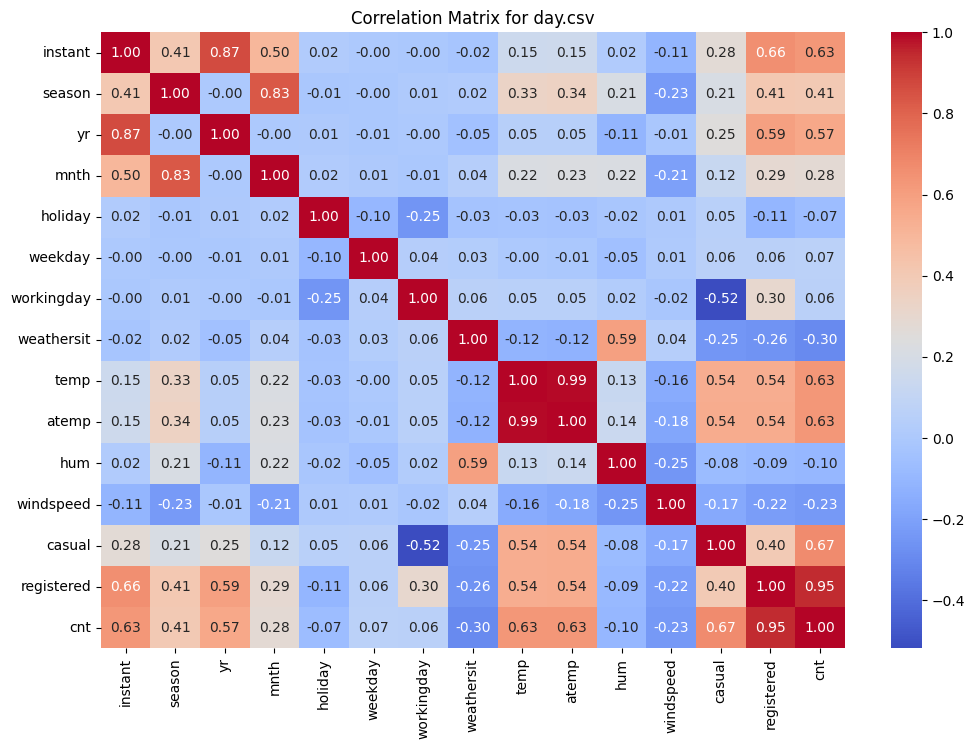

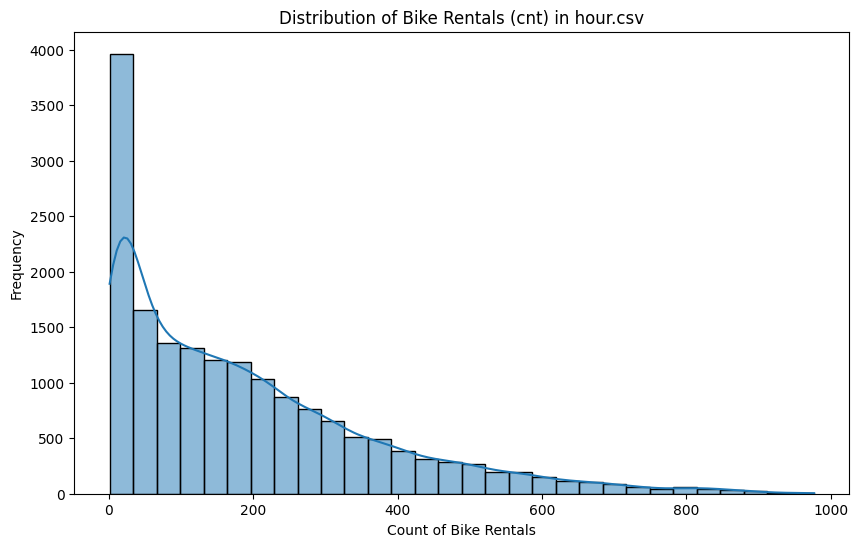

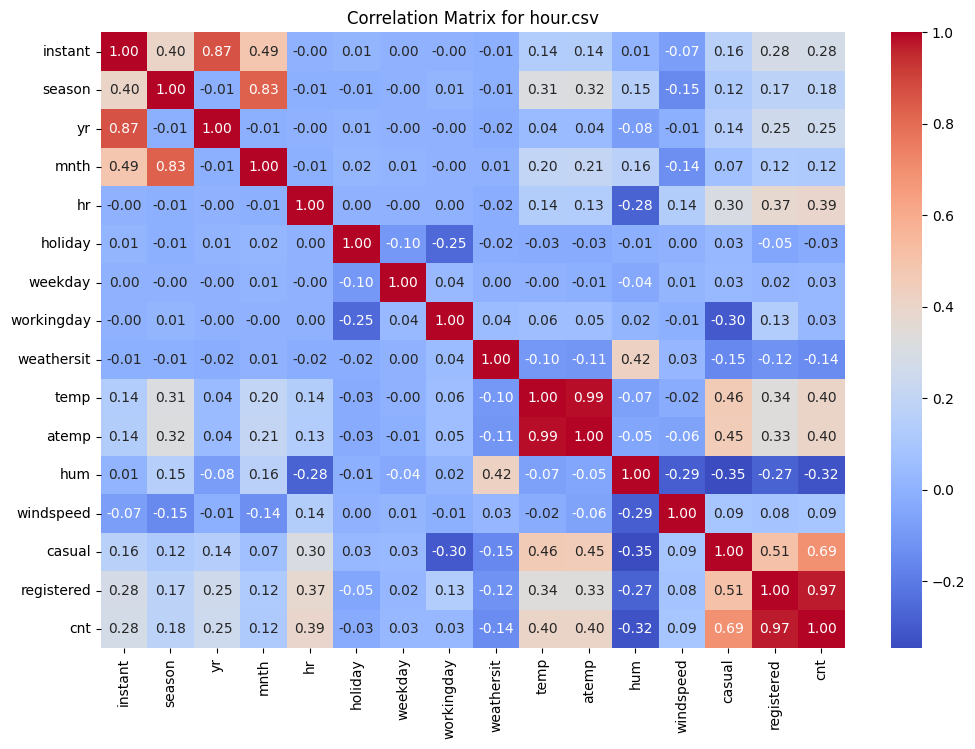

In [ ]:
# Load cleaned dataset
product_df = pd.read_csv('/content/cleaned_day.csv')
product_pd = pd.read_csv('/content/cleaned_hour.csv')

# EDA for day.csv
# Visualisasi distribusi variabel target (cnt)
plt.figure(figsize=(10, 6))
sns.histplot(data=product_df, x='cnt', bins=30, kde=True)
plt.title('Distribution of Bike Rentals (cnt) in day.csv')
plt.xlabel('Count of Bike Rentals')
plt.ylabel('Frequency')
plt.show()

# Visualisasi korelasi antar variabel
plt.figure(figsize=(12, 8))
sns.heatmap(product_df.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for day.csv')
plt.show()

# EDA for hour.csv
# Visualisasi distribusi variabel target (cnt)
plt.figure(figsize=(10, 6))
sns.histplot(data=product_pd, x='cnt', bins=30, kde=True)
plt.title('Distribution of Bike Rentals (cnt) in hour.csv')
plt.xlabel('Count of Bike Rentals')
plt.ylabel('Frequency')
plt.show()

# Visualisasi korelasi antar variabel
plt.figure(figsize=(12, 8))
sns.heatmap(product_pd.select_dtypes(include=[np.number]).corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix for hour.csv')
plt.show()


## Visualization & Explanatory Analysis

### Pertanyaan 1:

Pada bulan apa sepeda banyak dipakai?

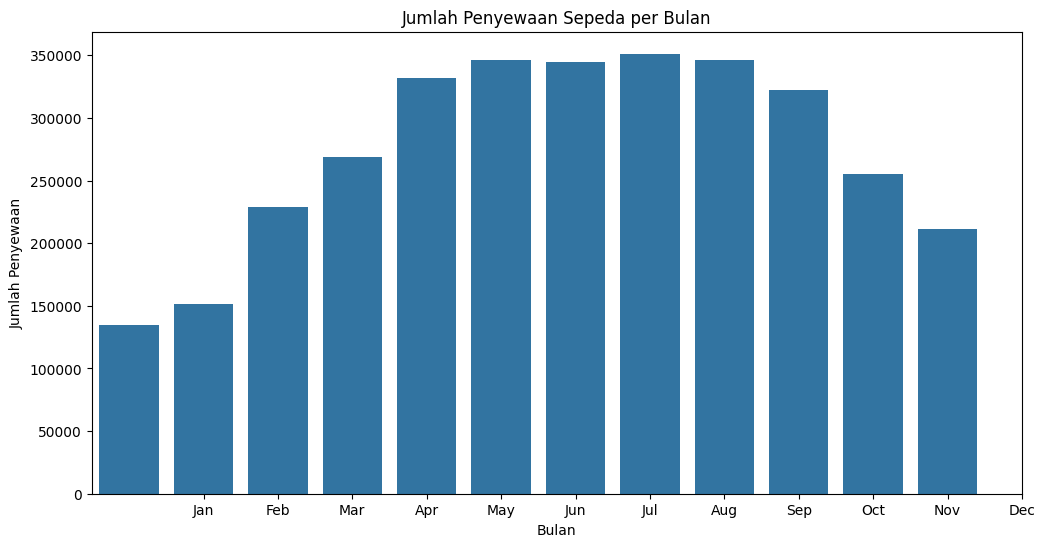

In [55]:
# Menggunakan DataFrame product_df yang telah dibaca sebelumnya
# Konversi kolom 'dteday' menjadi tipe data datetime
product_df['dteday'] = pd.to_datetime(product_df['dteday'])

# Ekstrak bulan dari kolom 'dteday'
product_df['month'] = product_df['dteday'].dt.month

# Hitung jumlah penyewaan sepeda per bulan
rentals_per_month = product_df.groupby('month')['cnt'].sum().reset_index()

# Plot grafik
plt.figure(figsize=(12, 6))
sns.barplot(data=rentals_per_month, x='month', y='cnt')
plt.title('Jumlah Penyewaan Sepeda per Bulan')
plt.xlabel('Bulan')
plt.ylabel('Jumlah Penyewaan')
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


Sesuai dengan data yang diperoleh, bisa kita lihat bahwa pada bulan juli yang merupakan bulan dimana sepeda banyak yang disewa.

### Pertanyaan 2:

Apakah cuaca mempengaruhi jumlah sewa sepeda?

[2 1 3]


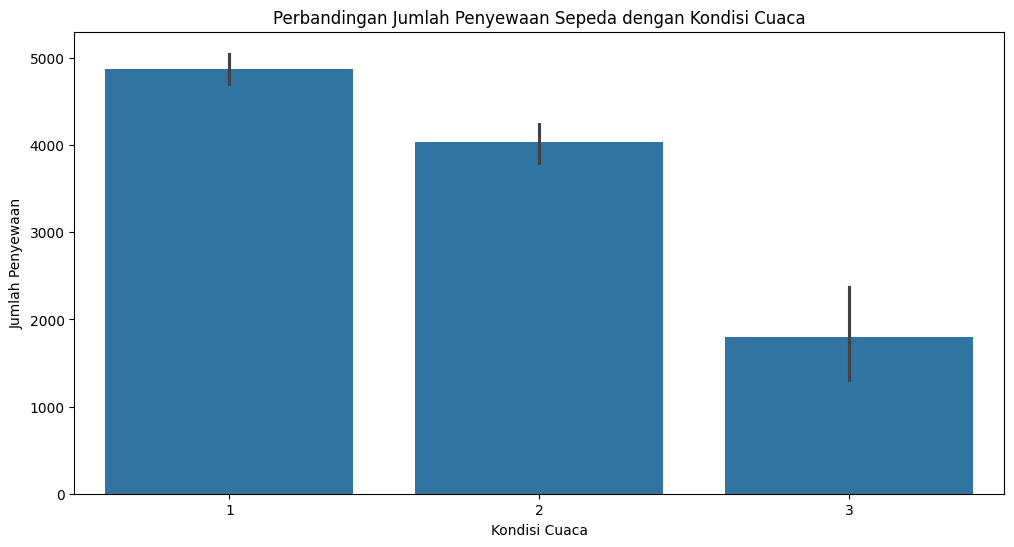

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

# Menggunakan DataFrame product_df yang telah dibaca sebelumnya

# Plot grafik
plt.figure(figsize=(12, 6))
sns.barplot(data=product_df, x='weathersit', y='cnt')
plt.title('Perbandingan Jumlah Penyewaan Sepeda dengan Kondisi Cuaca')
plt.xlabel('Kondisi Cuaca')
plt.ylabel('Jumlah Penyewaan')
plt.show()


Dapat kita lihat bahwa terdapat kondisi cuaca 1(Clear, Few clouds, Partly cloudy, Partly cloudy), 2(Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist), dan 3(Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds). Jadi benar bahwa cuaca mempengaruhi banyaknya jumlah sewa sepeda

## Conclusion

### Conclution pertanyaan 1

Setelah kita melakukan analisis pada data dan memvisualisasikannya, jumlah penyewa sepeda tiap bulan berbeda-beda. Bisa kita lihat pada bulan januari hingga juli bahwa penyewa sepeda mengalami kenaikan yang banyak walaupun sempat ada pengurangan sedikit, tetapi penyewa sepeda juga mengalami penurunan di bulan juli hingga desember. Sesuai data yang diperoleh maka bulan yang memiliki penyewa sepeda terbanyak adalah bulan juli.




### Conclution pertanyaan 2

Setelah kita melakukan analisis pada data dan memvisualisasikannya, jumlah penyewa sepeda dipengaruhi juga oleh cuaca. Bisa kita lihat pada kondisi cuaca 1, 2, 3 memiliki jumlah penyewa sepeda yang berbeda-beda. Kondisi cuaca ke-3 memiliki julah penyewa sepeda yang sedikit dikarenakan cuaca sedang hujan sedikit dan terdapat petir. Lalu kondisi cuaca ke-2 menampilkan bahwa penyewa sepeda lebih banyak dari pada cuaca ke-3 karena cuaca ke-2 hanya berkabut sedikit, dan berawan. Lalu untuk cuaca ke-1 memiliki jumlah penyewa sepeda terbanyak dikarenakan cuaca cerah.